# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
cor = df.corr()

In [7]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


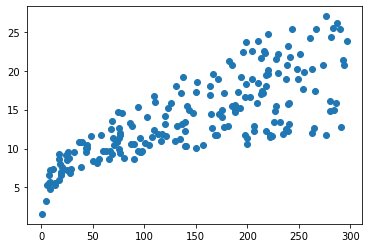

In [8]:
plt.figure()
plt.scatter(df["TV"],df["sales"])
plt.show()

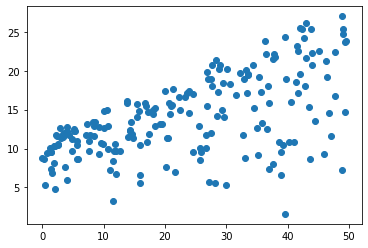

In [9]:
plt.figure()
plt.scatter(df["radio"],df["sales"])
plt.show()

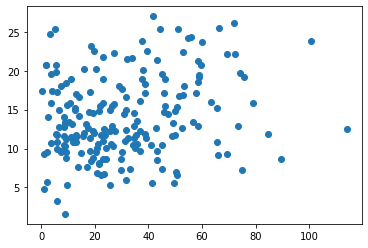

In [10]:
plt.figure()
plt.scatter(df["newspaper"],df["sales"])
plt.show()

In [11]:
# separate target and feature
X = df[["TV"]]
y = df["sales"]

In [12]:
# separating train and test data
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [14]:
# Training model
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
# ols
# theta1 = sum(x-xbar)(y-ybar)/(x-xbar)2
# theta0 = y - theta1x
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.intercept_

6.923519536059554

In [18]:
model.coef_

array([0.04812204])

In [19]:
# predictions
#y_pred = 0.04x + 6.9

In [20]:
y_pred = model.predict(X_test)

In [21]:
# Model evaluation

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mse = mean_squared_error(y_test,y_pred)

In [24]:
rmse = np.sqrt(mse)

In [25]:
r2 = r2_score(y_test,y_pred)

In [26]:
print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 10.571057434656955, rmse: 3.251316261863333, r2: 0.575061860494331


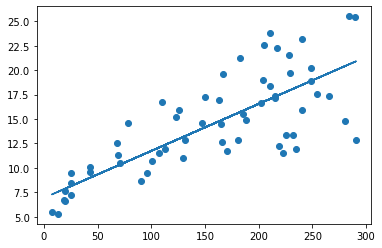

In [28]:
# plot the model
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

9.440936561425886
[0.1874808]
mse: 14.604130559272193, rmse: 3.8215351050686674, r2: 0.41293932917162335


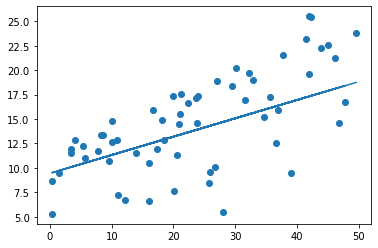

In [29]:
# radio
X = df[["radio"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

11.82966888487788
[0.06532045]
mse: 25.49745237441493, rmse: 5.049500210358935, r2: -0.024953278429509007


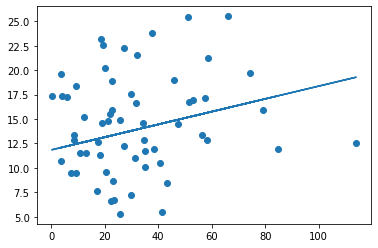

In [30]:
# newspaper
X = df[["newspaper"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

In [31]:
# multiple linear regression


X = df[["TV","radio","newspaper"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))


2.9372157346906125
[0.04695205 0.17658644 0.00185115]
mse: 1.9289249074665717, rmse: 1.3888574107756966, r2: 0.9224605706201435


In [ ]:
# comparing coef

# TV - 0.04 -- 0.04
# Radio - 0.18 -- 0.17
# newspaper - 0.06 -- 0.00

In [32]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [33]:
# taking care of multicolinearity, removing newspaper
X = df[["TV","radio"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

2.9647671191401574
[0.04697554 0.17765046]
mse: 1.9147050289721788, rmse: 1.383728668840889, r2: 0.9230321850256801


In [34]:
# multi-dimension trick - y_pred and residual

residual = y_test - y_pred

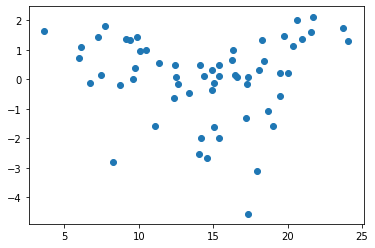

In [35]:
plt.figure()
plt.scatter(y_pred,residual)
plt.show()

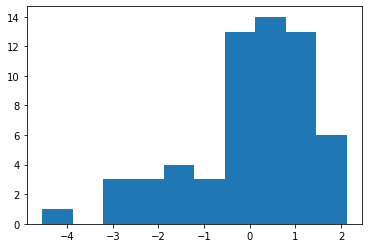

In [36]:
# residual histogram
plt.figure()
plt.hist(residual)
plt.show()

In [37]:
# Linear 
def poly_1(x):
    
    y = 4*x + 5
    return y    


# Quadratic
def poly_2(x):
    
    y = 6*(x**2) + 4*x + 5
    return y

# Cubic
def poly_3(x):
    
    y = 8*(x**3) + 6*(x**2) + 4*x + 5
    return y


# Plot
def plot(x,y):
    
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [38]:
x = np.arange(-100,100)

In [39]:
y = poly_1(x)

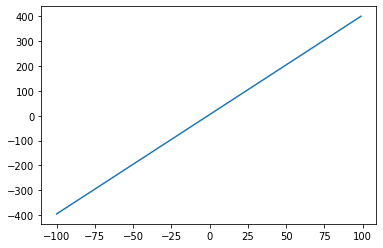

In [40]:
plot(x,y)

In [41]:
y = poly_2(x)

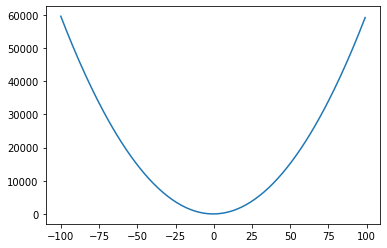

In [42]:
plot(x,y)

In [43]:
y = poly_3(x)

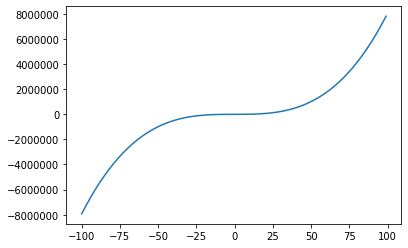

In [44]:
plot(x,y)

In [45]:
# polynomial regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(2)

In [48]:
X = df[["TV","radio"]]
y = df["sales"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [50]:
X_train_poly = poly.fit_transform(X_train)

In [51]:
X_test_poly = poly.transform(X_test)

In [52]:
model  = LinearRegression()

In [53]:
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred = model.predict(X_test_poly)

In [55]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 0.17238345081006942, rmse: 0.4151908607015205, r2: 0.9930704848288269


In [56]:
residual = y_test - y_pred

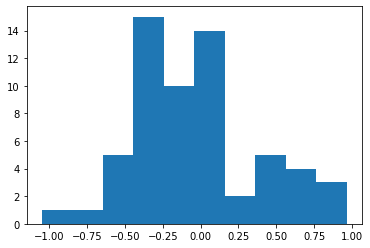

In [57]:
plt.figure()
plt.hist(residual)
plt.show()